In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np

#3

a

In [33]:
def convolucion_discreta(x, h):
    M1, N1 = x.shape
    M2, N2 = h.shape

    # Sin esto no se aplican las propiedades conmutativas, asociativas y distributivas aunque no sea literalmente deslizar el filtro
    h_invertido = np.flip(h)

    output_rows = M1 + M2 - 1
    output_cols = N1 + N2 - 1
    resultado = np.zeros((output_rows, output_cols))
    x_padded = np.pad(x, ((M2 - 1, M2 - 1), (N2 - 1, N2 - 1)), mode='constant', constant_values=0)

    for i in range(output_rows):
        for j in range(output_cols):
            submatriz = x_padded[i:i+M2, j:j+N2]
            resultado[i, j] = np.sum(submatriz * h_invertido)
    return resultado



x = np.array([[1, 4, 1],
              [2, 5, 3]])

h = np.array([[0, -1, 1],
              [-1, 4, -1],
              [0, -1, 0]])

resultado = convolucion_discreta(x, h)
print("Resultado de la convolución:")
print(resultado)


Resultado de la convolución:
[[ 0. -1. -3.  3.  1.]
 [-1. -2. 11.  2.  2.]
 [-2.  2. 11.  6. -3.]
 [ 0. -2. -5. -3.  0.]]


In [34]:
h2 = np.array([[1,2,3]])

resultado = convolucion_discreta(x, h2)
print("Resultado de la convolución:")
print(resultado)

Resultado de la convolución:
[[ 1.  6. 12. 14.  3.]
 [ 2.  9. 19. 21.  9.]]


In [35]:
h3 = np.array([[-2],[3],[-1]])

resultado = convolucion_discreta(x, h3)
print("Resultado de la convolución:")
print(resultado)

Resultado de la convolución:
[[-2. -8. -2.]
 [-1.  2. -3.]
 [ 5. 11.  8.]
 [-2. -5. -3.]]


b

conmutativa

In [36]:
resultado_1 = convolucion_discreta(x, h)
resultado_2 = convolucion_discreta(h, x)

print("Resultado de la convolución 1:")
print(resultado_1)

print("Resultado de la convolución 2:")
print(resultado_2)

Resultado de la convolución 1:
[[ 0. -1. -3.  3.  1.]
 [-1. -2. 11.  2.  2.]
 [-2.  2. 11.  6. -3.]
 [ 0. -2. -5. -3.  0.]]
Resultado de la convolución 2:
[[ 0. -1. -3.  3.  1.]
 [-1. -2. 11.  2.  2.]
 [-2.  2. 11.  6. -3.]
 [ 0. -2. -5. -3.  0.]]


In [37]:
resultado_1 = convolucion_discreta(x, h2)
resultado_2 = convolucion_discreta(h2, x)

print("Resultado de la convolución 1:")
print(resultado_1)

print("Resultado de la convolución 2:")
print(resultado_2)

Resultado de la convolución 1:
[[ 1.  6. 12. 14.  3.]
 [ 2.  9. 19. 21.  9.]]
Resultado de la convolución 2:
[[ 1.  6. 12. 14.  3.]
 [ 2.  9. 19. 21.  9.]]


In [38]:
resultado_1 = convolucion_discreta(x, h3)
resultado_2 = convolucion_discreta(h3, x)

print("Resultado de la convolución 1:")
print(resultado_1)

print("Resultado de la convolución 2:")
print(resultado_2)

Resultado de la convolución 1:
[[-2. -8. -2.]
 [-1.  2. -3.]
 [ 5. 11.  8.]
 [-2. -5. -3.]]
Resultado de la convolución 2:
[[-2. -8. -2.]
 [-1.  2. -3.]
 [ 5. 11.  8.]
 [-2. -5. -3.]]


asociativa

In [39]:
resultado_1 = convolucion_discreta(convolucion_discreta(x, h), h2)
resultado_2 = convolucion_discreta(x, convolucion_discreta(h2, h))

print("Resultado de la convolución 1:")
print(resultado_1)

print("Resultado de la convolución 2:")
print(resultado_2)


Resultado de la convolución 1:
[[  0.  -1.  -5.  -6.  -2.  11.   3.]
 [ -1.  -4.   4.  18.  39.  10.   6.]
 [ -2.  -2.   9.  34.  42.  12.  -9.]
 [  0.  -2.  -9. -19. -21.  -9.   0.]]
Resultado de la convolución 2:
[[  0.  -1.  -5.  -6.  -2.  11.   3.]
 [ -1.  -4.   4.  18.  39.  10.   6.]
 [ -2.  -2.   9.  34.  42.  12.  -9.]
 [  0.  -2.  -9. -19. -21.  -9.   0.]]


In [40]:
h_z_sum = np.array([[5,8,2]]) + h2 #algun vector del mismo tamaño de h2
resultado_1 = convolucion_discreta(x, h_z_sum)
resultado_2 = convolucion_discreta(x, np.array([[5,8,2]]) ) + convolucion_discreta(x, h2)

print("Resultado de la convolución 1:")
print(resultado_1)

print("Resultado de la convolución 2:")
print(resultado_2)


Resultado de la convolución 1:
[[ 6. 34. 51. 30.  5.]
 [12. 50. 78. 55. 15.]]
Resultado de la convolución 2:
[[ 6. 34. 51. 30.  5.]
 [12. 50. 78. 55. 15.]]


#4

In [31]:
imagen = Image.open('einstein.jpg') # Es la imagen que está en el campus
imagen = imagen.convert('L')
imagen_np = np.array(imagen)


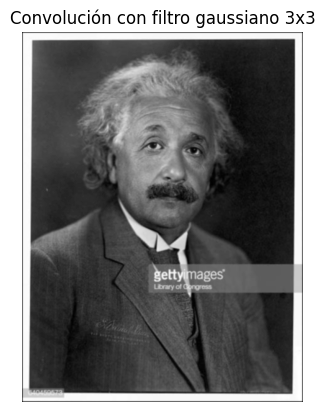

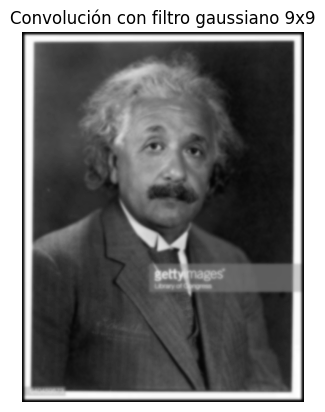

In [41]:
# Filtro Gaussiano 3x3 (normalizado)
filtro_gaussiano_3x3 = np.array([[1, 2, 1],
                                 [2, 4, 2],
                                 [1, 2, 1]]) / 16

# Filtro Gaussiano 9x9 (aproximado)
filtro_gaussiano_9x9 = np.array([[1, 1, 2, 2, 2, 2, 2, 1, 1],
                                 [1, 2, 2, 4, 4, 4, 2, 2, 1],
                                 [2, 2, 4, 8, 8, 8, 4, 2, 2],
                                 [2, 4, 8, 16, 16, 16, 8, 4, 2],
                                 [2, 4, 8, 16, 32, 16, 8, 4, 2],
                                 [2, 4, 8, 16, 16, 16, 8, 4, 2],
                                 [2, 2, 4, 8, 8, 8, 4, 2, 2],
                                 [1, 2, 2, 4, 4, 4, 2, 2, 1],
                                 [1, 1, 2, 2, 2, 2, 2, 1, 1]]) / 256


imagen_convolucion_gaussiano_3x3 = convolucion_discreta(imagen_np, filtro_gaussiano_3x3)
imagen_convolucion_gaussiano_9x9 = convolucion_discreta(imagen_np, filtro_gaussiano_9x9)


plt.imshow(imagen_convolucion_gaussiano_3x3, cmap='gray')
plt.title('Convolución con filtro gaussiano 3x3')
plt.axis('off')
plt.show()

plt.imshow(imagen_convolucion_gaussiano_9x9, cmap='gray')
plt.title('Convolución con filtro gaussiano 9x9')
plt.axis('off')
plt.show()

Sin máscara

In [42]:
def filtro_media_manual(ima, tamaño_filtro=3):
  filas, columnas = len(ima), len(ima[0])
  offset = tamaño_filtro // 2
  resultado = [[0] * columnas for _ in range(filas)]

  for i in range(offset, filas - offset):
    for j in range(offset, columnas - offset):
      suma = 0
      contador = 0
      for ki in range(-offset, offset + 1):
        for kj in range(-offset, offset + 1):
          suma += ima[i + ki][j + kj]
          contador += 1
      resultado[i][j] = suma / contador
  return resultado

In [43]:
resultado_media_3x3 = filtro_media_manual(imagen_np, 3)
resultado_media_9x9 = filtro_media_manual(imagen_np, 9)


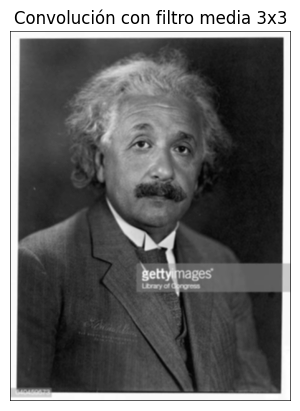

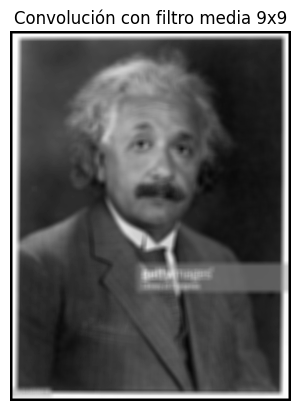

In [44]:
plt.imshow(resultado_media_3x3, cmap='gray')
plt.title('Convolución con filtro media 3x3')
plt.axis('off')
plt.show()

plt.imshow(resultado_media_9x9, cmap='gray')
plt.title('Convolución con filtro media 9x9')
plt.axis('off')
plt.show()

In [45]:
def filtro_minimo_manual(ima, tamaño_filtro=3):
  filas, columnas = len(ima), len(ima[0])
  offset = tamaño_filtro // 2
  resultado = [[0] * columnas for _ in range(filas)]

  for i in range(offset, filas - offset):
    for j in range(offset, columnas - offset):
      minimo = float('inf')
      for ki in range(-offset, offset + 1):
        for kj in range(-offset, offset + 1):
          minimo = min(minimo, ima[i + ki][j + kj])
      resultado[i][j] = minimo
  return resultado

In [17]:
resultado_minimo_3x3 = filtro_minimo_manual(imagen_np, 3)
resultado_minimo_9x9 = filtro_minimo_manual(imagen_np, 9)


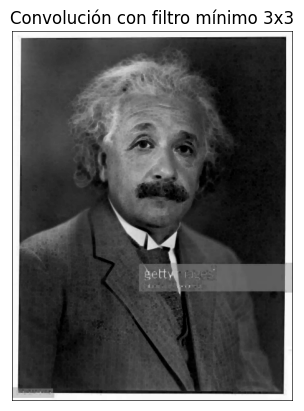

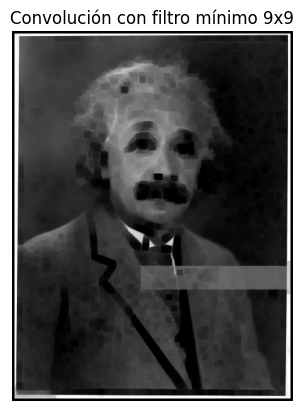

In [18]:
plt.imshow(resultado_minimo_3x3, cmap='gray')
plt.title('Convolución con filtro mínimo 3x3')
plt.axis('off')
plt.show()

plt.imshow(resultado_minimo_9x9, cmap='gray')
plt.title('Convolución con filtro mínimo 9x9')
plt.axis('off')
plt.show()

In [19]:
def filtro_maximo_manual(ima, tamaño_filtro=3):
  filas, columnas = len(ima), len(ima[0])
  offset = tamaño_filtro // 2
  resultado = [[0] * columnas for _ in range(filas)]

  for i in range(offset, filas - offset):
    for j in range(offset, columnas - offset):
      maximo = float('-inf')
      for ki in range(-offset, offset + 1):
        for kj in range(-offset, offset + 1):
          maximo = max(maximo, ima[i + ki][j + kj])
      resultado[i][j] = maximo
  return resultado

In [20]:
resultado_maximo_3x3 = filtro_maximo_manual(imagen_np, 3)
resultado_maximo_9x9 = filtro_maximo_manual(imagen_np, 9)

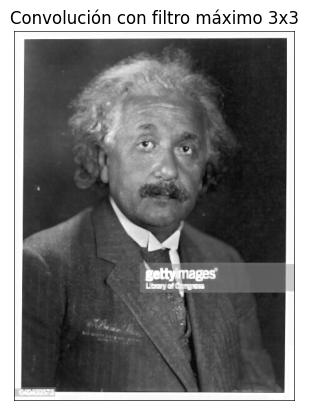

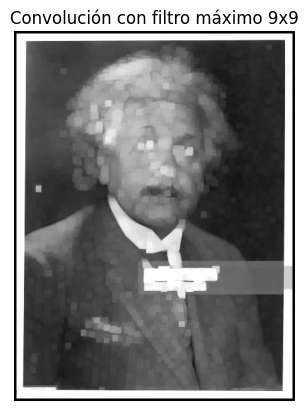

In [21]:
plt.imshow(resultado_maximo_3x3, cmap='gray')
plt.title('Convolución con filtro máximo 3x3')
plt.axis('off')
plt.show()

plt.imshow(resultado_maximo_9x9, cmap='gray')
plt.title('Convolución con filtro máximo 9x9')
plt.axis('off')
plt.show()

In [22]:
def filtro_mediana_manual(imagen, tamaño_filtro=3):
  filas, columnas = len(imagen), len(imagen[0])
  offset = tamaño_filtro // 2
  resultado = [[0] * columnas for _ in range(filas)]

  for i in range(offset, filas - offset):
    for j in range(offset, columnas - offset):
      valores = []
      for ki in range(-offset, offset + 1):
        for kj in range(-offset, offset + 1):
          valores.append(imagen[i + ki][j + kj])
      valores.sort()
      resultado[i][j] = valores[len(valores) // 2]  # Mediana
  return resultado

In [23]:
resultado_mediana_3x3 = filtro_mediana_manual(imagen_np, 3)
resultado_mediana_9x9 = filtro_mediana_manual(imagen_np, 9)

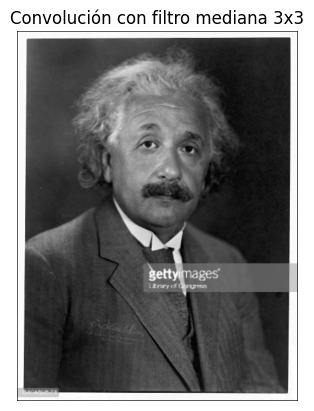

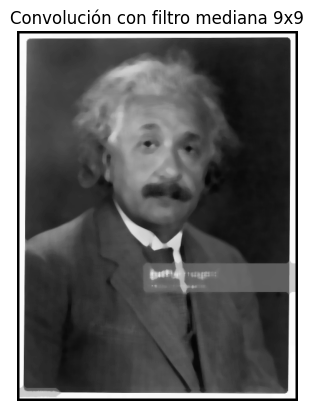

In [24]:
plt.imshow(resultado_mediana_3x3, cmap='gray')
plt.title('Convolución con filtro mediana 3x3')
plt.axis('off')
plt.show()

plt.imshow(resultado_mediana_9x9, cmap='gray')
plt.title('Convolución con filtro mediana 9x9')
plt.axis('off')
plt.show()

Con máscara

In [25]:
def aplicar_filtro_media(imagen, mascara):
  filas, columnas = len(imagen), len(imagen[0])
  filas_mascara, columnas_mascara = len(mascara), len(mascara[0])
  offset_fila = filas_mascara // 2
  offset_col = columnas_mascara // 2
  resultado = [[0] * columnas for _ in range(filas)]

  for i in range(offset_fila, filas - offset_fila):
    for j in range(offset_col, columnas - offset_col):
      suma = 0
      for ki in range(-offset_fila, filas_mascara - offset_fila):
        for kj in range(-offset_col, columnas_mascara - offset_col):
          suma += imagen[i + ki][j + kj] * mascara[ki + offset_fila][kj + offset_col]
      resultado[i][j] = suma
  return resultado


In [26]:
# Máscara a)
mascara_a_i = [[1/3 for _ in range(3)] for _ in range(1)]
resultado_a_i = aplicar_filtro_media(imagen_np, mascara_a_i)

mascara_a_ii = [[1/3 for _ in range(1)] for _ in range(3)]
resultado_a_ii = aplicar_filtro_media(imagen_np, mascara_a_ii)

In [27]:
# Máscara b)
mascara_b_i = [[1/21 for _ in range(21)] for _ in range(1)]
resultado_b_i = aplicar_filtro_media(imagen_np, mascara_b_i)

mascara_b_ii = [[1/21 for _ in range(1)] for _ in range(21)]
resultado_b_ii = aplicar_filtro_media(imagen_np, mascara_b_ii)

In [28]:
mascara_c = [[1/6 for _ in range(2)] for _ in range(3)]
resultado_c = aplicar_filtro_media(imagen_np, mascara_c)

[[0.16666666666666666, 0.16666666666666666], [0.16666666666666666, 0.16666666666666666], [0.16666666666666666, 0.16666666666666666]]


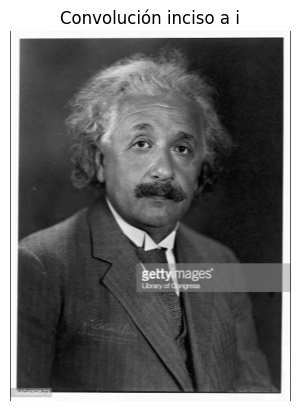

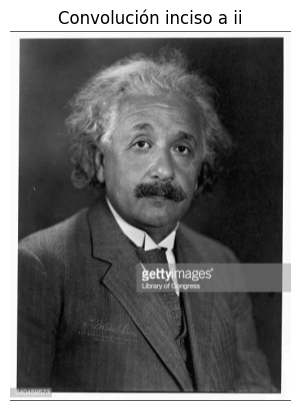

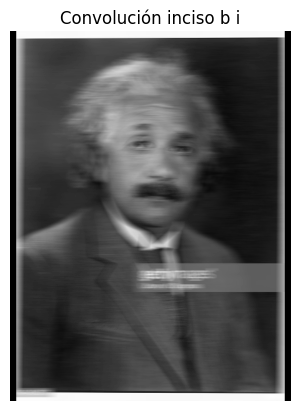

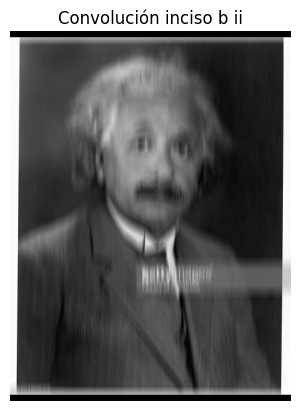

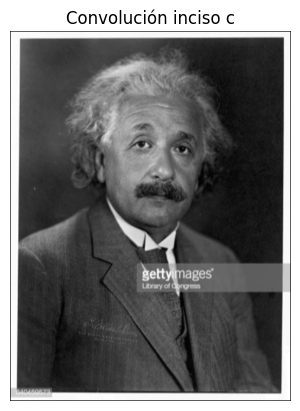

In [29]:
plt.imshow(resultado_a_i, cmap='gray')
plt.title('Convolución inciso a i')
plt.axis('off')
plt.show()

plt.imshow(resultado_a_ii, cmap='gray')
plt.title('Convolución inciso a ii')
plt.axis('off')
plt.show()

plt.imshow(resultado_b_i, cmap='gray')
plt.title('Convolución inciso b i')
plt.axis('off')
plt.show()

plt.imshow(resultado_b_ii, cmap='gray')
plt.title('Convolución inciso b ii')
plt.axis('off')
plt.show()

plt.imshow(resultado_c, cmap='gray')
plt.title('Convolución inciso c')
plt.axis('off')
plt.show()

#5

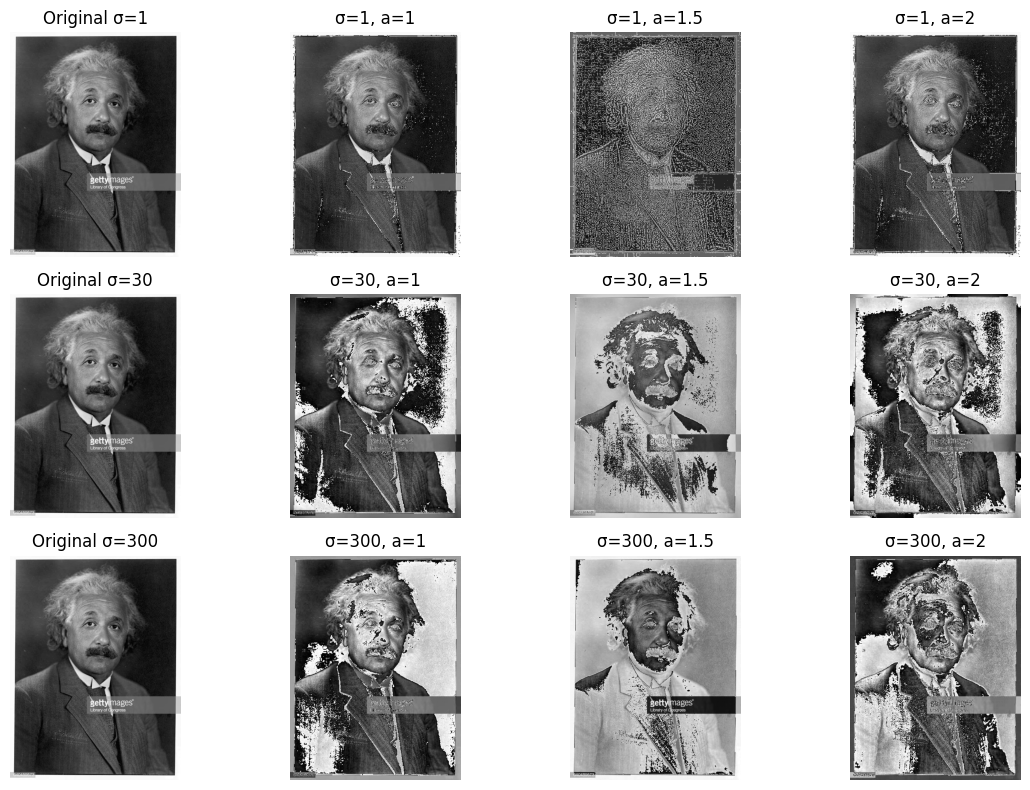

In [48]:
import cv2

def aplicar_filtro_gaussiano(imagen, sigma):
  return cv2.GaussianBlur(imagen, (0, 0), sigma)

def unsharp_mask(imagen, sigma, a):
  imagen_suavizada = aplicar_filtro_gaussiano(imagen, sigma)
  mascara = imagen - imagen_suavizada
  imagen_nitida = imagen + a * mascara
  return imagen_nitida

sigmas = [1, 30, 300]
valores_a = [1, 1.5, 2]

fig, axes = plt.subplots(len(sigmas), len(valores_a) + 1, figsize=(12, 8))

for i, sigma in enumerate(sigmas):
  axes[i, 0].imshow(imagen_np, cmap='gray')
  axes[i, 0].set_title(f'Original σ={sigma}')

  for j, a in enumerate(valores_a):
    imagen_nitida = unsharp_mask(imagen_np, sigma, a)
    axes[i, j+1].imshow(imagen_nitida, cmap='gray')
    axes[i, j+1].set_title(f'σ={sigma}, a={a}')

  for ax in axes[i, :]:
    ax.axis('off')

plt.tight_layout()
plt.show()
